> #### Setup  

> Before running data.world notebooks for the first time, you'll need to:  
1. Install data.world's Python package, including optional `pandas` dependencies: 
```shell
pip install git+git://github.com/datadotworld/data.world-py.git#egg=project[pandas]
```
1. Obtain an API access token at https://data.world/settings/advanced
1. Store API access token using the `dw` command-line tool: 
```shell
dw configure
```

> Once your environment is set up, these steps do not need to be repeated for other data.world notebooks.

In [1]:
import datadotworld as dw
import charts_function_list
import os
import math

In [2]:
base_, data, outputs = charts_function_list.folder_setup()

In [3]:
# Datasets are referenced by their path
dataset_key = 'len/intelligence-of-dogs'

# Or simply by their URL
dataset_key = 'https://data.world/len/intelligence-of-dogs'

In [4]:
# Load dataset (onto the local file system)
dogs = dw.load_dataset(dataset_key)  # cached under ~/.dw/cache

In [115]:
dog_frame = pd.DataFrame(dogs.tables['dog_intelligence']) #create data frame from dog intelligence table
dog_frame.index = dog_frame.index+1 #add one to index
dog_frame.fillna({'obey':.25},inplace=True)#data source suggests the NA should be .25. Fill with that
dog_frame['obey']=dog_frame['obey'].astype('float')

In [124]:
terriers = dog_frame[(dog_frame['breed'].str.lower().str.contains('terrier'))|(dog_frame['breed']=='Miniature Schnauzer')]

In [126]:
dog_chart = charts_function_list.chart_maker(title ='Dog Intelligence: Terriers vs Other Dog')

In [140]:
def dog_bars(df,color,zorder=1,alpha=.9):
    return ax.bar(left = df.index+.5,bottom = df.reps_lower,height=(df.reps_upper-df.reps_lower),alpha=alpha,width=.5,color=color,edgecolor='white',linewidth=.1,zorder=zorder,clip_on=False)

C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Futura BK'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


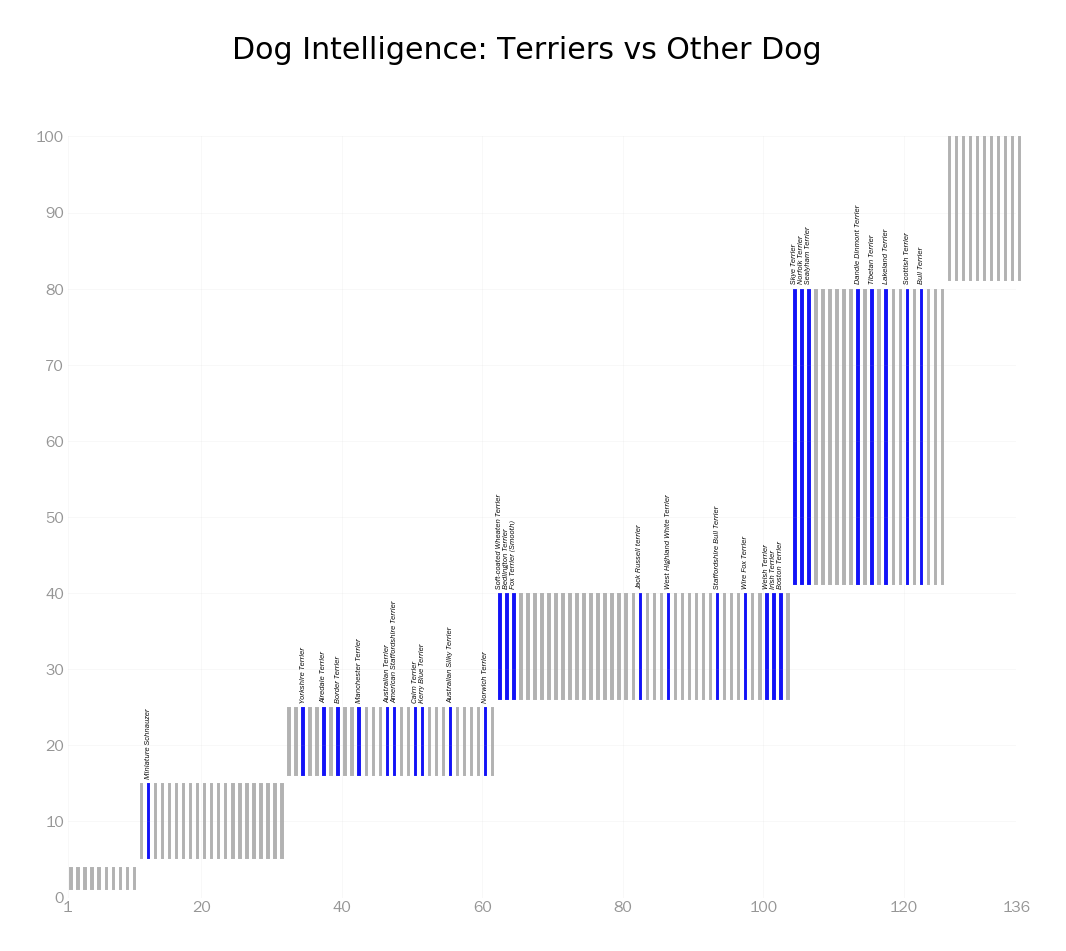

In [151]:
fig = dog_chart.initial_fig_axis(figsize=(17,14))
fig.suptitle(dog_chart.title,fontsize=30,fontname='Futura BK')
ax = dog_chart.axes_set_up(fig)
dog_bars(dog_frame,'grey',alpha=.6)
dog_bars(terriers,'blue')

for item in terriers.index:
    ax.text(item,terriers.loc[item]['reps_upper']+.6,terriers.loc[item]['breed'],rotation=90,va='bottom',ha='left',style='italic',fontsize=8)


ax.set_xticks([1]+[(20*x) for x in range (1,math.ceil(len(dog_frame)/20))]+[len(dog_frame)])
ax.set_xlim(1,136)
dog_chart.tick_params_(ax)
dog_chart.y_axis_setup(ax,0,100,interval=10)
plt.show()

In [154]:
#import matplotlib.font_manager

from matplotlib.font_manager import FontManager,font
set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

AttributeError: type object 'FontManager' has no attribute 'ttflist'

In [ ]:
#sql method
dog_frame = dw.query(dataset_key, 'SELECT * FROM dog_intelligence').dataframe